In [69]:
import json
import pathlib

flist = []
for p in pathlib.Path("../json/").iterdir():
    if p.is_file():
        print(p)
        flist.append(p)


../json/"MVP_seed=10_depth=5_ratio=0.5_size=10_maxSize=10_mutationRatio=0.5_start=10.0"


"MVP_seed=10_depth=5_ratio=0.5_size=10_maxSize=10_mutationRatio=0.5_start=10.0"


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 3131: invalid start byte

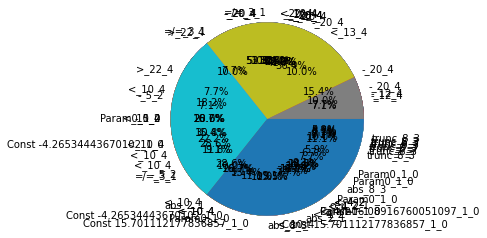

In [68]:
import matplotlib.pyplot as plt
import os

def draw(i,obj,dirname):
    current = obj[i]
    labels = []
    data = []
    for item in current:
        labels.append(item[0])
        data.append(item[1])
    plt.pie(data, labels=labels, autopct='%1.1f%%')
    plt.axis('equal')
    plt.savefig(dirname + "/" + str(i))

for fName in flist:
    f = open(fName)  
    file = f.read()
    obj = json.loads(file)
    name = str(fName).split('/')[-1]
    print(name)
    dirname = "../figs/" + name
    os.mkdir(dirname)

    for i in range(len(obj)):
        draw(i, obj, dirname)

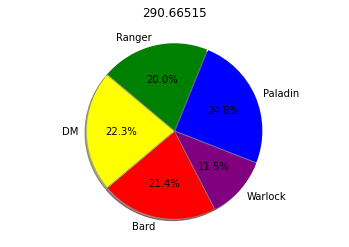

In [61]:
import numpy as np
import matplotlib.animation as animation
from matplotlib import pyplot as plt 

numbers = [[6.166, 5.976, 3.504, 7.104, 5.14],
 [7.472, 5.888, 3.264, 6.4825, 7.168],
 [7.5716, 9.936, 3.6, 8.536, 2.808],
 [2.604, 2.296, 0.0, 6.144, 4.836],
 [7.192, 4.932, 0.0, 6.016, 8.808],
 [7.192, 5.5755, 3.694, 9.376, 9.108],
 [7.63616, 5.912, 3.968, 6.672, 3.192],
 [3.41049, 5.44, 4.004, 7.212, 3.6954],
 [4.3143, 6.364, 3.584, 7.44, 5.78],
 [4.992, 3.9692, 4.272, 0.0, 2.528]]
numbers = np.array(numbers)

colors = ["yellow", "red", "purple", "blue", "green"]
explode = [0.01, 0.01, 0.01, 0.01, 0.01]
labels = ["DM", "Bard", "Warlock", "Paladin", "Ranger"]
z = np.array([0,0,0,0,0]).astype(np.float)

fig,ax = plt.subplots()

def update(num):
    
    global z
    
    ax.clear()
    ax.axis('equal')     
    z += numbers[num]  
    pie = ax.pie(z, explode=explode, labels=labels, colors=colors, 
                 autopct='%1.1f%%', shadow=True, startangle=140)
    ax.set_title(sum(z))    
    
ani = animation.FuncAnimation(fig, update, frames=range(10), repeat=False)
ani.save('test.gif', writer='pillow', fps=1)